In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
import pandas as pd  
import seaborn as sns 
from scipy import stats

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(boston[boston.CHAS==0])

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [6]:
boston['House_price'] = boston_dataset.target
boston.sort_values('House_price',ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0


Bivariate plots of data where MEDV != 50


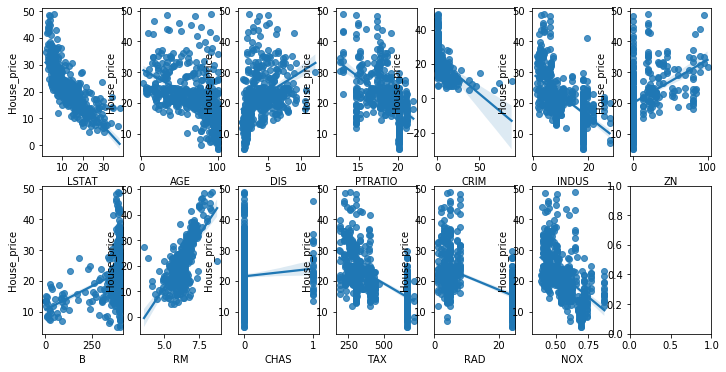

In [7]:
print("Bivariate plots of data where MEDV != 50")
feature_cols = set(boston.columns) - set(['House_price'])
boston1 = boston[boston['House_price'] != 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='House_price', data=boston1, ax=axs[int(i/7), i%7])

Bivariate plots of data where MEDV == 50


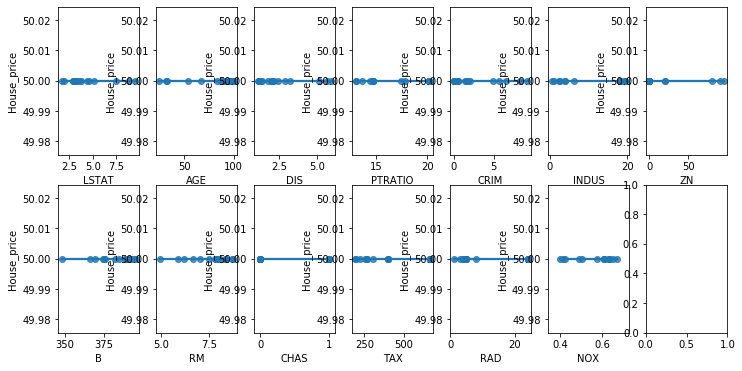

In [8]:
print("Bivariate plots of data where MEDV == 50")
boston1 = boston[boston['House_price'] == 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='House_price', data=boston1, ax=axs[int(i/7), i%7])

In [9]:
boston=boston[boston.House_price!=50]

In [10]:
boston.sort_values('House_price',ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
262,0.52014,20.0,3.97,0.0,0.6470,8.398,91.5,2.2885,5.0,264.0,13.0,386.86,5.91,48.8
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.18337,0.0,27.74,0.0,0.6090,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
399,9.91655,0.0,18.10,0.0,0.6930,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
400,25.04610,0.0,18.10,0.0,0.6930,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
405,67.92080,0.0,18.10,0.0,0.6930,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


In [11]:
boston.isnull().sum()


CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
House_price    0
dtype: int64

In [12]:
boston[boston.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price


In [13]:
boston.shape

(490, 14)

In [14]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'House_price'],
      dtype='object')

In [15]:
boston.dtypes

CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
B              float64
LSTAT          float64
House_price    float64
dtype: object

In [16]:
boston.nunique()

CRIM           489
ZN              26
INDUS           74
CHAS             2
NOX             80
RM             431
AGE            350
DIS            398
RAD              9
TAX             64
PTRATIO         44
B              342
LSTAT          442
House_price    228
dtype: int64

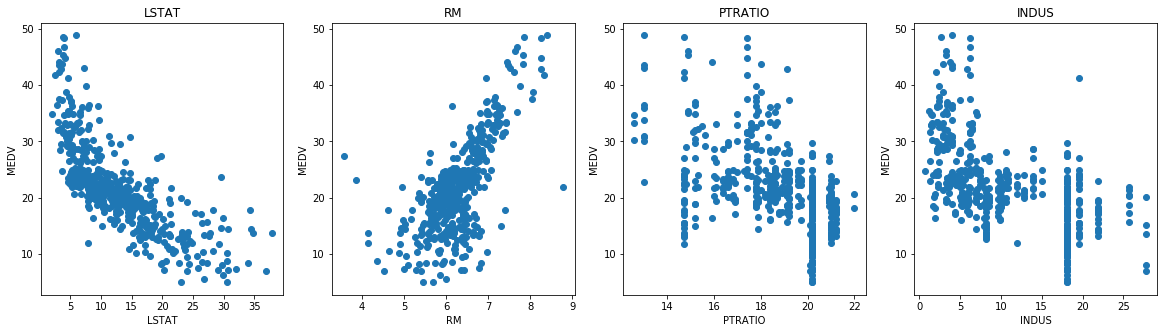

In [17]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','PTRATIO','INDUS']
target = boston['House_price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [22]:
boston.shape

(490, 14)

In [23]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


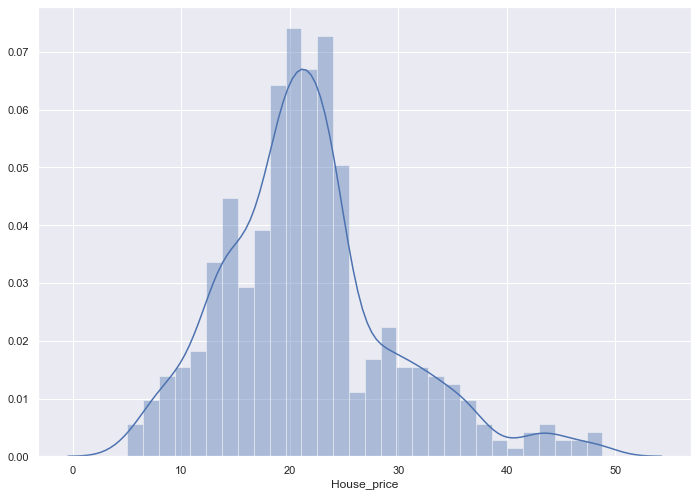

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['House_price'], bins=30)
plt.show()

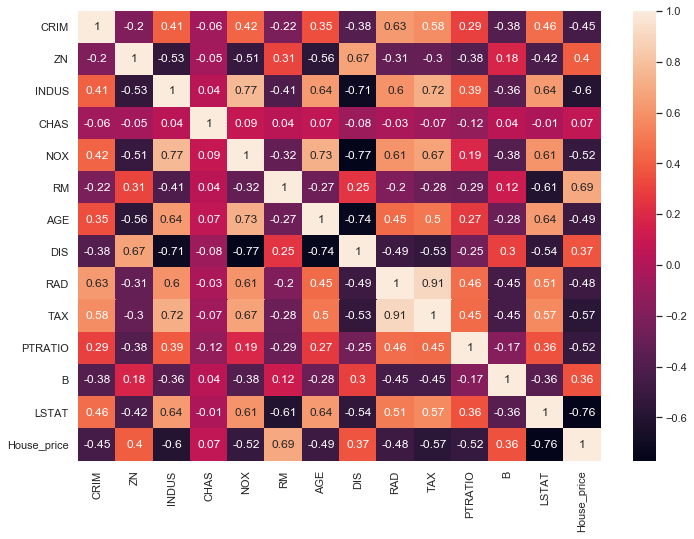

In [25]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [26]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'],boston['PTRATIO'],boston['INDUS']], columns = ['LSTAT','RM','PTRATIO','INDUS'])
Y = boston['House_price']
print(X)
print(Y)

     LSTAT     RM  PTRATIO  INDUS
0     4.98  6.575     15.3   2.31
1     9.14  6.421     17.8   7.07
2     4.03  7.185     17.8   7.07
3     2.94  6.998     18.7   2.18
4     5.33  7.147     18.7   2.18
..     ...    ...      ...    ...
485   9.67  6.593     21.0  11.93
486   9.08  6.120     21.0  11.93
487   5.64  6.976     21.0  11.93
488   6.48  6.794     21.0  11.93
489   7.88  6.030     21.0  11.93

[490 rows x 4 columns]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House_price, Length: 490, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(343, 4)
(147, 4)
(343,)
(147,)


In [28]:

# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()


In [29]:
from sklearn import model_selection
import math

print("Root Mean Square Error (RMSE) score\n")
scoring = 'neg_mean_squared_error'
kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)
cv = model_selection.cross_val_score(reg, X_train, y_train, cv=kfold, scoring=scoring)
sqrt_cv = [math.sqrt(abs(i)) for i in cv]
print("{} ({})".format( np.mean(sqrt_cv), np.std(sqrt_cv)))
print('Result from each iteration of cross validation:', cv, '\n')

Root Mean Square Error (RMSE) score

3.4629342738383806 (0.8989938870373956)
Result from each iteration of cross validation: [-10.17960668 -29.64223742 -13.21936754  -8.11786767  -7.48497485
  -5.89717903 -18.20994462 -10.00838794 -18.27825005  -6.96322214] 



In [33]:
print("R-squared Value\n")
scoring = 'r2'
kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)
cv = model_selection.cross_val_score(reg, X_train, y_train, cv=kfold, scoring=scoring)
print("{} ({})".format( cv.mean(), cv.std()))
print('Result from each iteration of cross validation:', cv, '\n')

R-squared Value

0.8056595894718563 (0.08604137705736108)
Result from each iteration of cross validation: [0.8576005  0.60707346 0.77346979 0.87381503 0.85017266 0.91089588
 0.72990324 0.84111279 0.75076627 0.86178629] 



RMSE score: 3.00798357219609
R2 score: 0.8276828957667536

Scatter plot of y_test against y_pred:


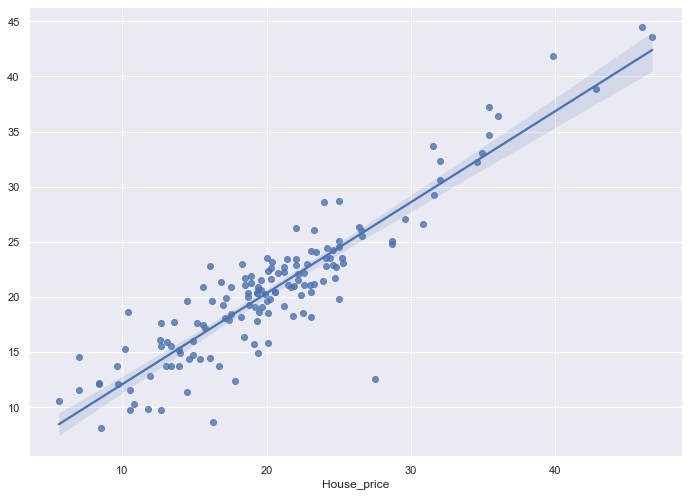

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

model = reg
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
print('\nScatter plot of y_test against y_pred:')
sns.regplot(y_test, y_pred);

In [32]:
print(X_test)

     LSTAT     RM  PTRATIO  INDUS
452  18.13  5.926     20.2  18.10
84    9.62  6.389     18.5   4.49
434  17.44  6.749     20.2  18.10
473  23.97  5.414     20.1  27.74
428  23.79  5.854     20.2  18.10
..     ...    ...      ...    ...
5     5.21  6.430     18.7   2.18
116  12.04  6.176     17.8  10.01
45   10.21  5.682     17.9   6.91
16    6.58  5.935     21.0   8.14
453  14.76  5.713     20.2  18.10

[147 rows x 4 columns]


In [29]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(reg, 'C:/Users/samee/PycharmProjects/machine Learning/Xgb.pkl') 
  


['C:/Users/samee/PycharmProjects/machine Learning/Xgb.pkl']